Ce notebook contient des essais généraux concernant la descente de gradient.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Afin d'effectuer les tests, on place la grille des $z_k$ et on choisit les $\alpha_k$ de manière aléatoire.

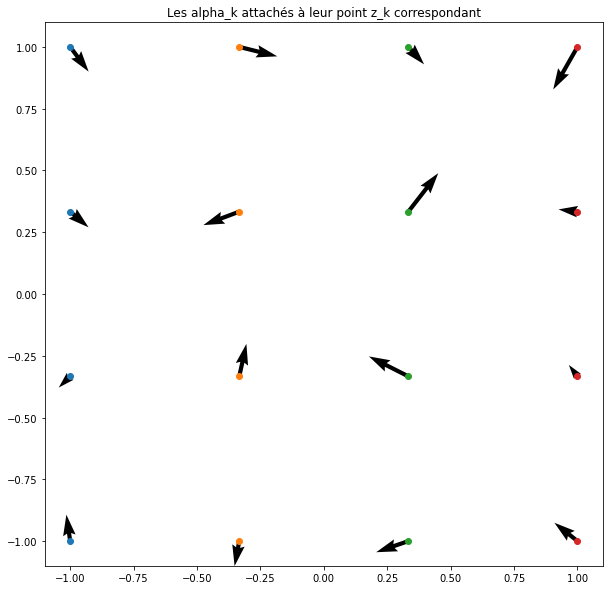

In [11]:
pas = 0.5
gauche = -1.0
droite = 1
h = int((droite - gauche)/pas)
D = h * h
zk_x, zk_y = np.meshgrid(np.linspace(gauche, droite, h),np.linspace(gauche, droite, h))
alphas_x = np.random.randn(h, h)
alphas_y = np.random.randn(h, h)

zk = np.array((zk_x.flatten(), zk_y.flatten())).T
alphas = np.array((alphas_x.flatten(), alphas_y.flatten())).T

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(zk_x, zk_y, marker= 'o', linestyle='none');
plt.quiver(zk_x, zk_y, alphas_x, alphas_y)
plt.title("Les alpha_k attachés à leur point z_k correspondant")
plt.show()

Ensuite, implémentons un algorithme de descente de gradient. On utilise les méthodes suivantes :
  - approximation du gradient par la formule $$ \frac{\partial f}{\partial x_i} (a) \approx \frac{f(a + \varepsilon e_i) - f(a)}{\varepsilon}$$
  avec $\varepsilon$ petit.
  - « backtracking line search » pour choisir le learning rate à chaque étape. voir https://en.wikipedia.org/wiki/Backtracking_line_search
  
  

In [3]:
def gradient_descent(f, start, dim, iterations=1000, epsilon=0.0001, learning_rate_guess=10.0,draw=True):
    if len(start) != dim:
        raise Exception("starting point must have right dimensions")
    #drawing stuff
    if (draw):
        points_x, points_y = [], []
    
    
    # descent point
    point = start;
    # initialise gradient var
    grad = np.array([0.0] * dim)
    # canonical base: e[0] = (1, 0, 0, ...) and e[dim - 1] = (0, 0, ..., 1).
    e = np.identity(dim)
    
    # backline search parameters
    tau = 0.5
    c = 0.5
    
    # temp vars
    m = 0.0
    t = 0.0
    l = 0.0
    
    for i in range(iterations):
        
        # roughly estimate gradient
        # df/dx_i (a) = (f(a + epsilon * e_i) - f(a)) / epsilon
        for d in range(dim):
            grad[d] = (f(point + epsilon * e[d]) - f(point)) / epsilon;
            
        m = np.dot(grad, grad);
        
       
        # backtracking line search for learning rate
        t = -c*m;
        # initial guess for learning rate
        l = learning_rate_guess
        
        # evaluate just one time at the current point
        value = f(point);

        while (value - f(point - l * grad)) < l * t:
            l = tau * l;

        # apply learning rate
        point -= l * grad;
        
        # drawing stuff
        if draw:
            points_x.append(point[0]);
            points_y.append(point[1]);
    # fin boucle gradient
    
    if draw:
        p = len(points_x)
        for i in range(p):
            plt.plot(points_x[i],points_y[i], marker= 'o', linestyle='none');
        plt.show()

    return point;

Pour tester, appliquons cet algorithme à une fonction simple dont on connais déjà le minimum : $f(x,y) = x^2 + y^2$.

On constate que la qualité d'approximation de la solution (0,0) dépend fortement des paramètres choisis
- point de départ
- nombre d'itérations
- learning rate initial à partir duquel on fait une backline search


Gradient descent with params: start= [1, 1], it= 10, lr= 0.5


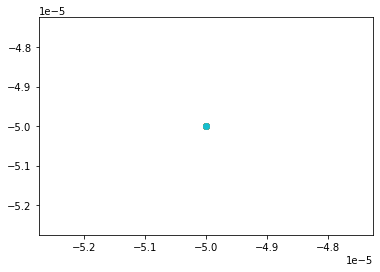

solution = [-4.99999996e-05 -4.99999996e-05]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 1.0


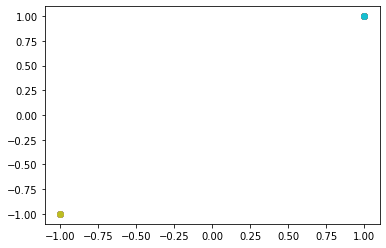

solution = [1. 1.]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 5.0


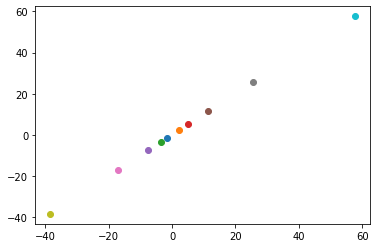

solution = [57.66787232 57.66787232]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 10.0


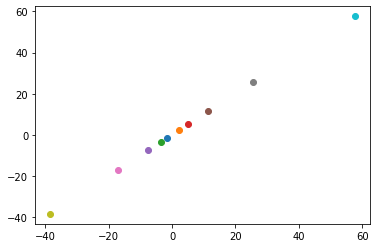

solution = [57.66787232 57.66787232]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 50.0


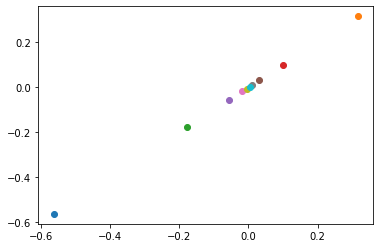

solution = [0.00312137 0.00312137]
--


Gradient descent with params: start= [1, 1], it= 10, lr= 100.0


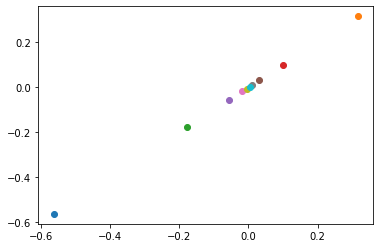

solution = [0.00312137 0.00312137]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 0.5


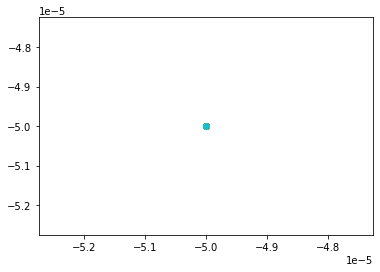

solution = [-4.99999996e-05 -4.99999996e-05]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 1.0


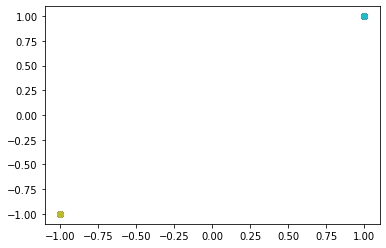

solution = [1. 1.]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 5.0


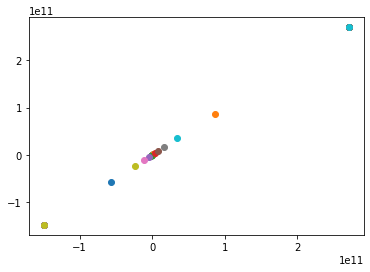

solution = [2.70562971e+11 2.70562971e+11]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 10.0


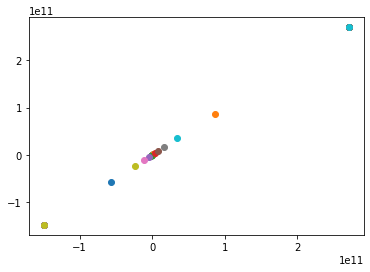

solution = [2.70562971e+11 2.70562971e+11]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 50.0


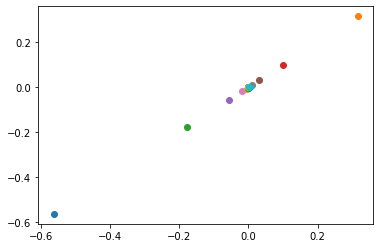

solution = [0.00083564 0.00083564]
--


Gradient descent with params: start= [1, 1], it= 100, lr= 100.0


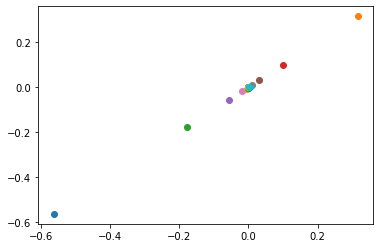

solution = [0.00083564 0.00083564]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 0.5


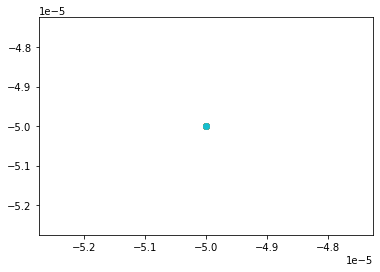

solution = [-4.99999453e-05 -4.99999453e-05]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 1.0


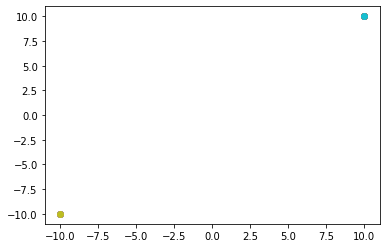

solution = [10. 10.]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 5.0


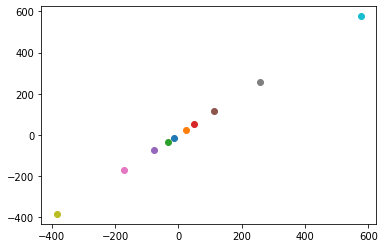

solution = [576.65322306 576.65322306]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 10.0


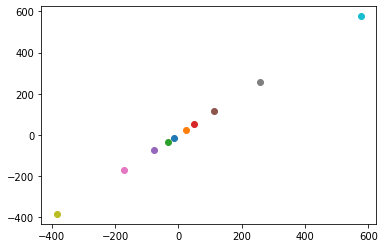

solution = [576.65322306 576.65322306]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 50.0


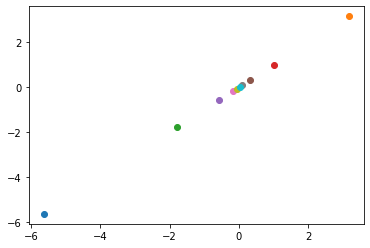

solution = [0.03166228 0.03166228]
--


Gradient descent with params: start= [10, 10], it= 10, lr= 100.0


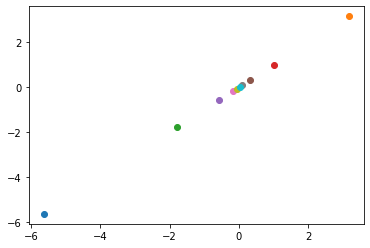

solution = [0.03166228 0.03166228]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 0.5


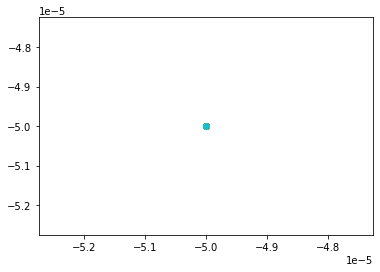

solution = [-4.99999453e-05 -4.99999453e-05]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 1.0


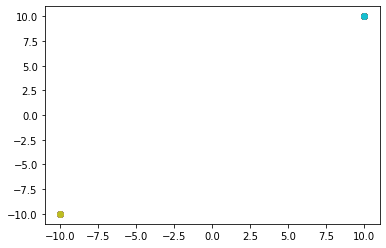

solution = [9.99999999 9.99999999]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 5.0


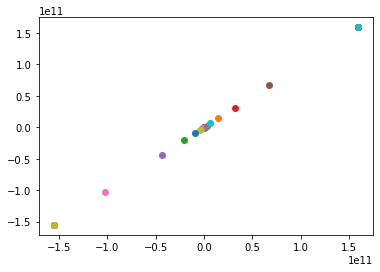

solution = [1.59220534e+11 1.59220534e+11]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 10.0


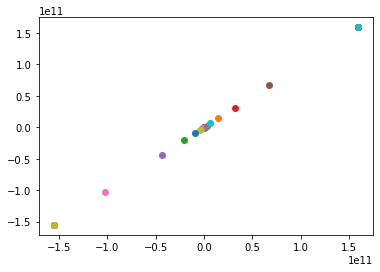

solution = [1.59220534e+11 1.59220534e+11]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 50.0


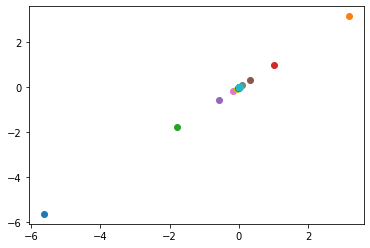

solution = [0.00057053 0.00057053]
--


Gradient descent with params: start= [10, 10], it= 100, lr= 100.0


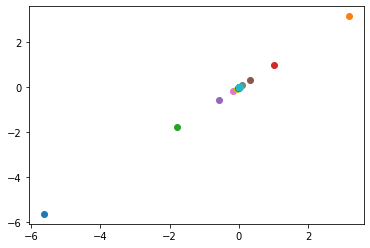

solution = [0.00057053 0.00057053]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 0.5


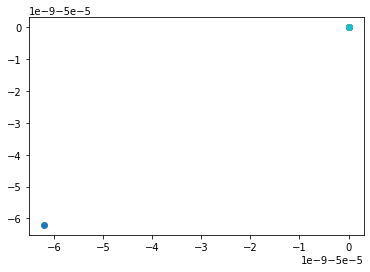

solution = [-5.e-05 -5.e-05]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 1.0


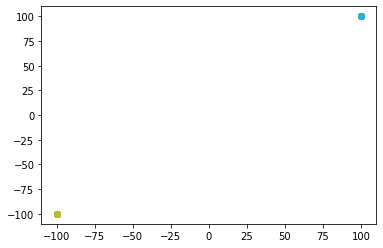

solution = [100.00000018 100.00000018]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 5.0


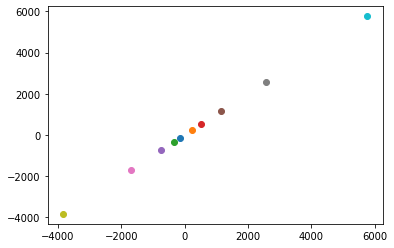

solution = [5766.50673863 5766.50673863]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 10.0


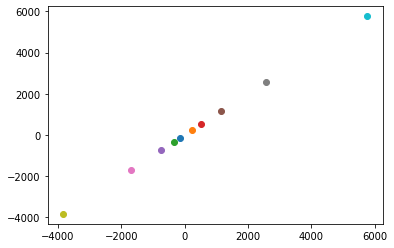

solution = [5766.50673863 5766.50673863]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 50.0


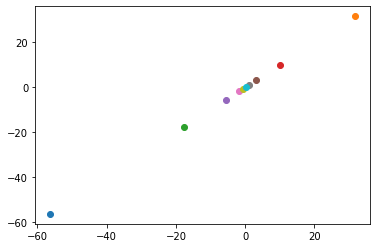

solution = [0.31707135 0.31707135]
--


Gradient descent with params: start= [100, 100], it= 10, lr= 100.0


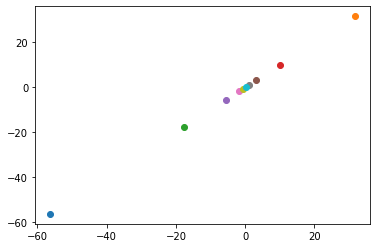

solution = [0.31707135 0.31707135]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 0.5


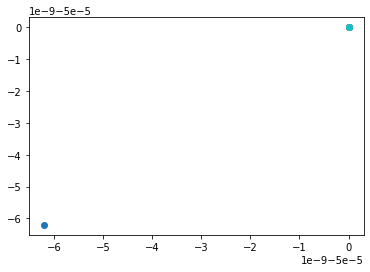

solution = [-5.e-05 -5.e-05]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 1.0


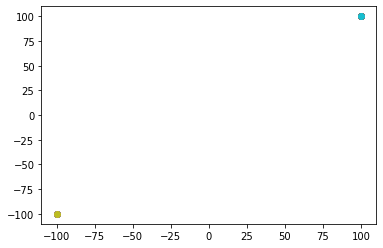

solution = [100.00000098 100.00000098]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 5.0


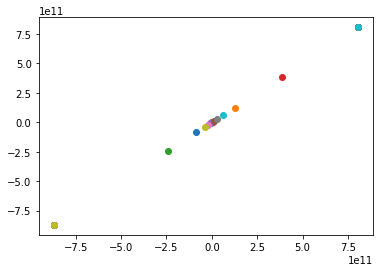

solution = [8.06661184e+11 8.06661184e+11]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 10.0


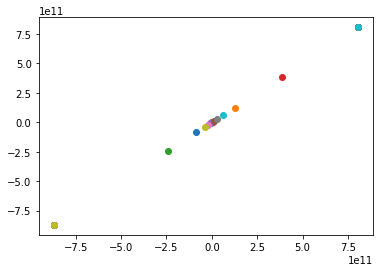

solution = [8.06661184e+11 8.06661184e+11]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 50.0


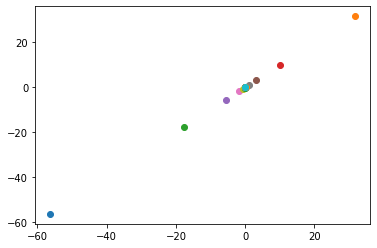

solution = [0.00159258 0.00159258]
--


Gradient descent with params: start= [100, 100], it= 100, lr= 100.0


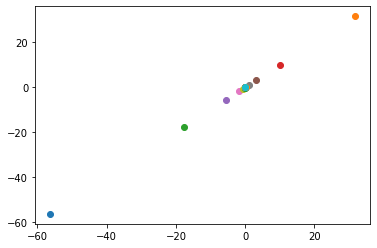

solution = [0.00159258 0.00159258]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 0.5


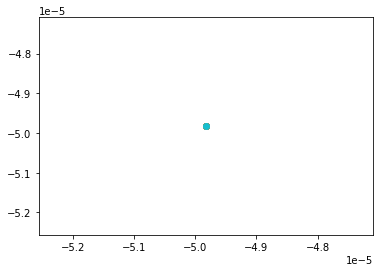

solution = [-4.98257577e-05 -4.98257577e-05]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 1.0


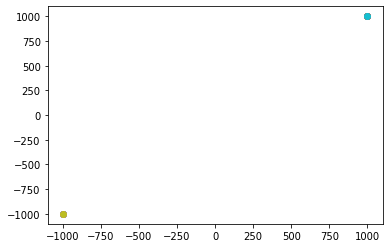

solution = [999.99999534 999.99999534]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 5.0


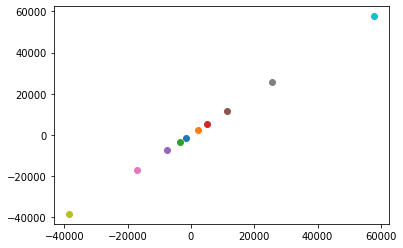

solution = [57665.04250257 57665.04250257]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 10.0


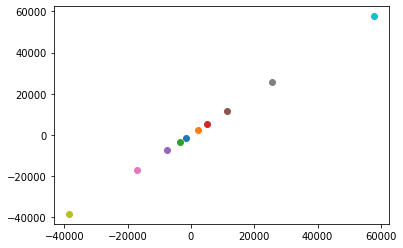

solution = [57665.04250257 57665.04250257]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 50.0


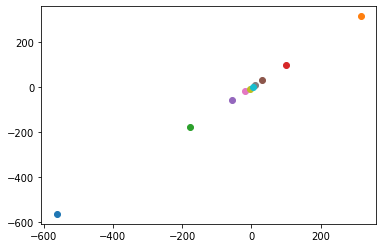

solution = [3.17116209 3.17116209]
--


Gradient descent with params: start= [1000, 1000], it= 10, lr= 100.0


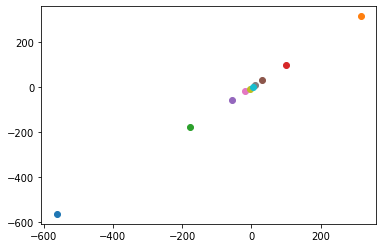

solution = [3.17116209 3.17116209]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 0.5


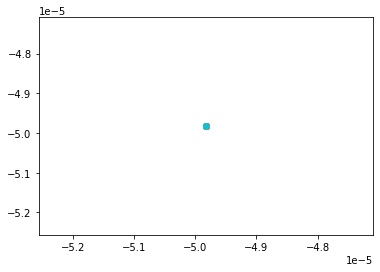

solution = [-4.98257577e-05 -4.98257577e-05]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 1.0


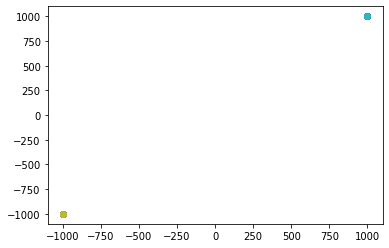

solution = [999.99999534 999.99999534]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 5.0


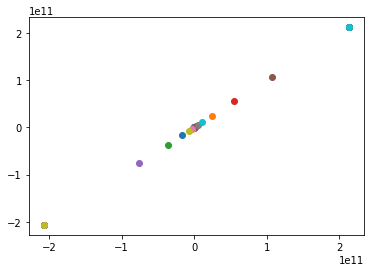

solution = [2.12693158e+11 2.12693158e+11]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 10.0


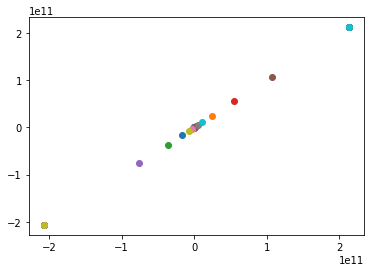

solution = [2.12693158e+11 2.12693158e+11]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 50.0


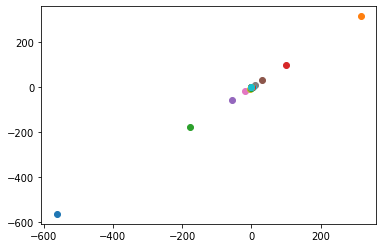

solution = [0.00110094 0.00110094]
--


Gradient descent with params: start= [1000, 1000], it= 100, lr= 100.0


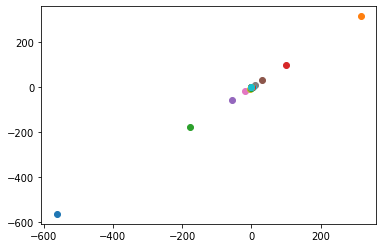

solution = [0.00110094 0.00110094]
--


done!


In [4]:


# La fonction à minimiser, ici de deux variables
def toto(param):
    return param[0] * param[0] + param[1] * param[1];

# dimension de l'espace ambiant
d = 2



import itertools

starting_points = [[1, 1], [10, 10], [100, 100], [1000, 1000]]
#it = [10, 100, 500]
it = [10,100]
lr = [0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
parameters = [starting_points, it, lr]

for param in itertools.product(*parameters):
    print("Gradient descent with params: start= {}, it= {}, lr= {}".format(param[0], param[1], param[2]))
    result = gradient_descent(toto, start=param[0], dim=d, iterations=param[1], learning_rate_guess=param[2]);
    print("solution =", result)
    print("--")
    print("")
    print("")

print("done!")

On veut maintenant appliquer la descente de gradient à notre fonctionnelle J $$J(v) = |v|^2 + \lambda D(\varphi_v(S), T)$$

On définit pour commencer la distance de Hausdorff.

In [5]:
def maxmin(A,B): # max sur les i du min sur les j, avec A et B des listes de k-uplets
    max_list = []
    for a in A:
        min_list = []
        for b in B:
            min_list.append(np.linalg.norm(a - b))
        max_list.append(np.min(min_list))
    return np.max(max_list)


# Distance de Hausdorff entre deux tableaux numpy.
def dist(A,B):
    return max(maxmin(A,B),maxmin(B,A))

A = np.array([[0., 0.], [1., 0.], [1., 1.]])

print(dist(A, A))

B = np.array([[0., 0.], [0., 1.], [1., 1.]])
print(dist(A, B))

B = np.array([[0., 0.], [0., 1.], [1., 1.], [1., 0.]])
print(dist(A, B))

0.0
1.0
1.0


Un élément $v$ sera encodé par ses coordonnées dans la base évoquée à la question 6 : $$v = \sum_{0 \leq k < D} v_k E_k, \text{  } v_k \in \mathbb{R}$$
    avec $$E_k(x) = \alpha_k e^{-|x - z_k|^2}$$

L'espace vectoriel $V$ est donc de dimension $D$, le nombre de $(z_k)$, ce qui sera donc la dimension utilisée pour la descente de gradient.

On implémente la fonction $\varphi_v$ ainsi que l'image directe par celle-ci.

In [6]:
# Calcule phi_v(point), point étant un point de l'espace ambiant
def phi_point(v, point):
    result = point
    for i in range(D):
        # z est un point de la grille, alpha le vecteur associé
        result += v[i] * np.exp(- (np.linalg.norm(point - zk[i])**2)) * alphas[i];
    return result;

# Renvoie l'image directe du tableau de points passé en argument par phi
def phi_array(v, points):
    result = [];
    
    for point in points:
        result.append(phi_point(v, point))
    
    return np.array(result);

In [7]:
# Quelques tests

# Formes aléatoires de dix points
S = np.random.randn(10, 2)
T = S * 0.95


v = np.array([0] * D)
print("v=", v)

print("S=", S)
print("phi_v(S)=", phi_array(v, S))

v = np.random.randn(D)
print("v=", v)

print("S=", S)
print("phi_v(S)=", phi_array(v, S))


v= [0 0 0 0]
S= [[-0.38787665 -0.58663209]
 [ 1.21560124 -0.24607842]
 [ 1.4684035  -0.44394377]
 [ 0.4074626  -0.07305261]
 [-1.39356118  1.3500192 ]
 [ 0.68967253  1.43189503]
 [ 1.2388364  -0.83252895]
 [ 0.47458279 -0.88898797]
 [ 1.31076693  0.28462035]
 [ 1.14785255 -1.40968018]]
phi_v(S)= [[-0.38787665 -0.58663209]
 [ 1.21560124 -0.24607842]
 [ 1.4684035  -0.44394377]
 [ 0.4074626  -0.07305261]
 [-1.39356118  1.3500192 ]
 [ 0.68967253  1.43189503]
 [ 1.2388364  -0.83252895]
 [ 0.47458279 -0.88898797]
 [ 1.31076693  0.28462035]
 [ 1.14785255 -1.40968018]]
v= [-0.79292787  1.19758205 -0.31464464 -0.10325176]
S= [[-0.38787665 -0.58663209]
 [ 1.21560124 -0.24607842]
 [ 1.4684035  -0.44394377]
 [ 0.4074626  -0.07305261]
 [-1.39356118  1.3500192 ]
 [ 0.68967253  1.43189503]
 [ 1.2388364  -0.83252895]
 [ 0.47458279 -0.88898797]
 [ 1.31076693  0.28462035]
 [ 1.14785255 -1.40968018]]
phi_v(S)= [[-0.526325   -0.90161265]
 [ 0.98616565 -0.98007625]
 [ 1.21834237 -1.2415809 ]
 [ 0.27159738 

Puis la fonctionnelle $J : \mathbb{R}^l \to \mathbb{R}^{+}$ à minimiser en $v$.
$$J(v) = |v|^2 + \lambda D(\varphi_v(S), T)$$


In [8]:
weight = 1.0;

def J(v, source, target):
    return np.linalg.norm(v)**2 + weight * dist(phi_array(v, source), target);

Quelques tests basiques.

In [16]:
# À nouveau quelques tests
S = np.random.randn(10, 2)
T = S * 0.95

v = np.random.randn(D)
print("v=", v)

print("S=", S)
print("phi_v(S)=", phi_array(v, S))

for i in range(10):
    print(J((0.1 * i) * v, S , T));

v= [-0.88359373 -0.49625896  0.59495685 -1.6223455   0.19306003 -1.90461951
  1.85880736  0.12751664  1.15339015  1.22521424  0.0899468  -1.301747
  0.41195758  1.00441052  0.32723032  0.32482385]
S= [[-0.4344859   2.72282406]
 [-1.1118413  -1.51042825]
 [ 0.68394121  1.05675188]
 [ 1.10269567 -0.73404964]
 [ 1.60756592 -1.83491172]
 [ 0.41281093  0.92554062]
 [ 0.31842431  0.05822758]
 [ 0.59482204  0.84945858]
 [-2.31520196 -0.65407772]
 [-0.37263709 -0.51954081]]
phi_v(S)= [[-0.33968235  2.66928298]
 [-1.0528911  -2.21149668]
 [ 0.99776086 -0.07298009]
 [ 2.06978458 -1.8730691 ]
 [ 2.06601639 -2.27971231]
 [-1.43028063  0.2058614 ]
 [-0.4964857  -1.44610448]
 [-1.31743079  0.14894942]
 [-2.28633041 -0.87955608]
 [-1.02992854 -2.59373361]]
1.1591256486102026
1.3361225213142465
1.8854030375211062
3.1568769567627704
4.694383526459513
6.411595008688757
8.546232170589715
10.75226931728315
13.17689625411327
15.91016362487659


Pour mieux se rendre compte, il faudrait dessiner.

v= [ 0.19265398 -0.11181406  0.26835703  0.52492973  0.0165988  -0.81057811
 -0.17103424  0.18262093  0.39168316 -0.46324234  0.19560177 -0.12524101
  0.3343405   0.62539375 -0.61079554 -0.4222979 ]


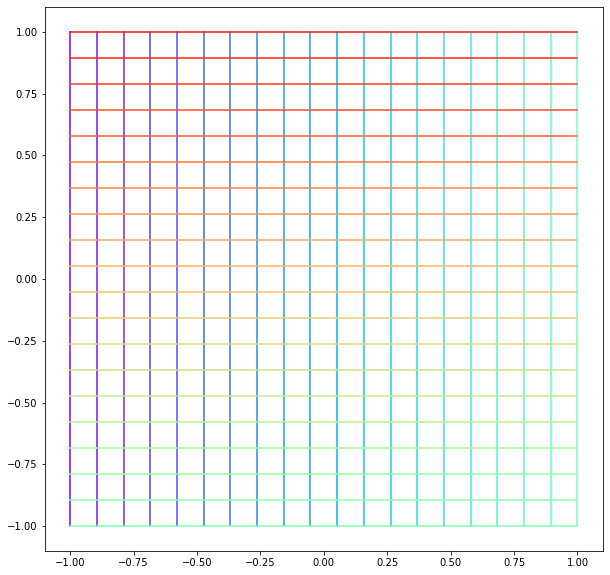

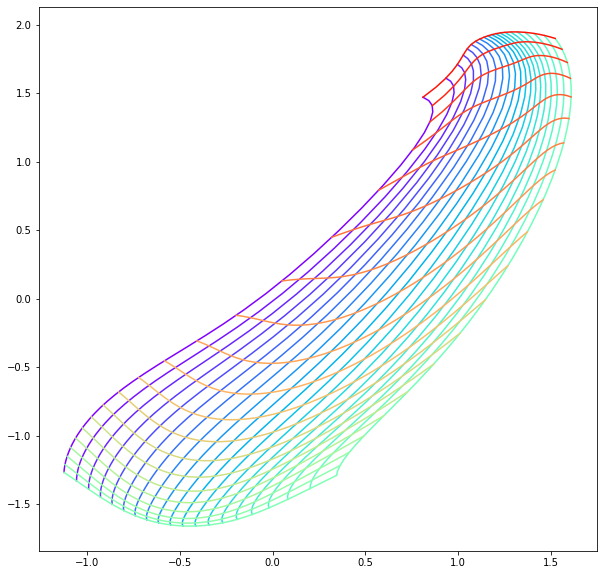

In [20]:
def vraie_grille(fonc, xmin=-1, xmax=1, ymin=-1, ymax=1, n_lignes=20, n_points_ligne=40):
    
    fig, ax = plt.subplots(figsize=(10, 10))
    lignes = []
    
    for x in np.linspace(xmin, xmax, n_lignes): #à x fixé, donc on itère sur les lignes verticales
        lignes.append([fonc(x,y) for y in np.linspace(ymin, ymax, n_points_ligne)]) #on remplit la ligne
    for y in np.linspace(ymin, ymax, n_lignes): #à y fixé, donc on itère sur les lignes horizontales
        lignes.append([fonc(x,y) for x in np.linspace(xmin, xmax, n_points_ligne)])
    
    i = 0
    p = len(lignes)
    for l in lignes:
        k = i/p # à partir du numéro d'indice de chaque ligne, on associe un nombre entre 0 et 1 pour assigner une couleur avec cm.get_cmap de matplotlib
        a,b = zip(*l) #extraire les abscisses et ordonnées 
        i = i + 1
        plt.plot(a,b,color=plt.cm.get_cmap("rainbow")(k))
        

def iden(x,y):
    return x,y

v = 0.4 * np.random.randn(D)
print("v=", v)

def phi_v_pour_grille(x,y):
    return phi_point(v, np.array([x, y]));
vraie_grille(iden)
vraie_grille(phi_v_pour_grille)



